In [3]:
from fastai.vision.all import URLs, untar_data, unet_learner, resnet34
from fastai.vision.all import get_image_files, SegmentationDataLoaders, SegmentationInterpretation
from fastai.vision.all import ImageBlock, MaskBlock, RandomSplitter, aug_transforms, DataBlock
import numpy as np

We will use Camvid dataset

## Segmentation with high-level API

In [4]:
path = untar_data(URLs.CAMVID_TINY)
print('path:', path)
print('path.ls()', path.ls())

path: /Users/quankento/.fastai/data/camvid_tiny
path.ls() [Path('/Users/quankento/.fastai/data/camvid_tiny/images'), Path('/Users/quankento/.fastai/data/camvid_tiny/labels'), Path('/Users/quankento/.fastai/data/camvid_tiny/codes.txt')]


In [5]:
codes = np.loadtxt(f'{path}/codes.txt', dtype=str)
codes

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car',
       'CartLuggagePram', 'Child', 'Column_Pole', 'Fence', 'LaneMkgsDriv',
       'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving',
       'ParkingBlock', 'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk',
       'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel',
       'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

In [6]:
fnames = get_image_files(f'{path}/images')
fnames[0]

Path('/Users/quankento/.fastai/data/camvid_tiny/images/0006R0_f02550.png')

In [7]:
labels = get_image_files(f'{path}/labels')
labels[0]

Path('/Users/quankento/.fastai/data/camvid_tiny/labels/Seq05VD_f02070_P.png')

As we can see above, the labels have the exact same name with `extra _P`

In [8]:
def label_func(fn): 
    return path/'labels'/f"{fn.stem}_P{fn.suffix}"

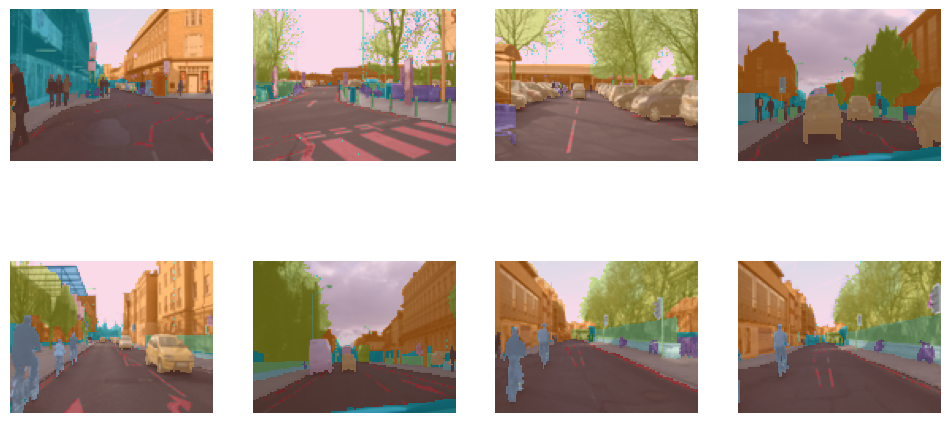

In [9]:
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = fnames, label_func = label_func, codes = codes
)
dls.show_batch(max_n=9)

In [10]:
learn = unet_learner(dls, resnet34)
learn.fine_tune(6)

epoch,train_loss,valid_loss,time
0,3.060518,2.716664,00:04


epoch,train_loss,valid_loss,time
0,1.977694,1.717813,00:03
1,1.703174,1.417117,00:03
2,1.509459,1.245657,00:03
3,1.359619,1.001474,00:03
4,1.230848,0.983770,00:03
5,1.129457,0.921366,00:03


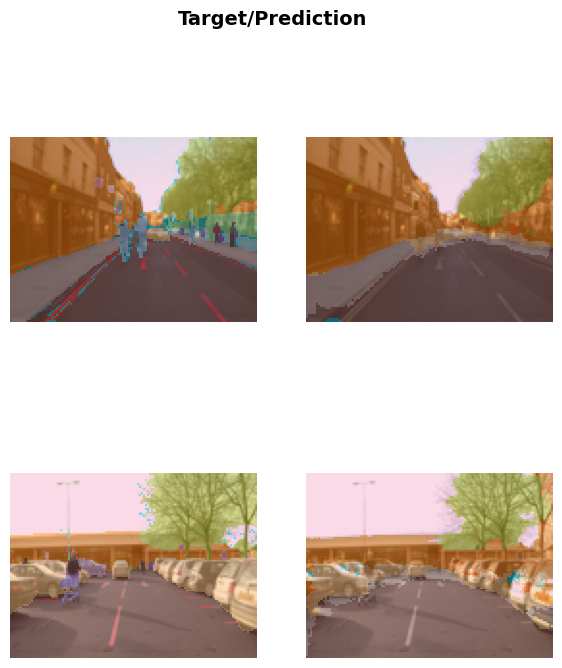

In [11]:
learn.show_results(max_n=2, figsize=(7, 8))

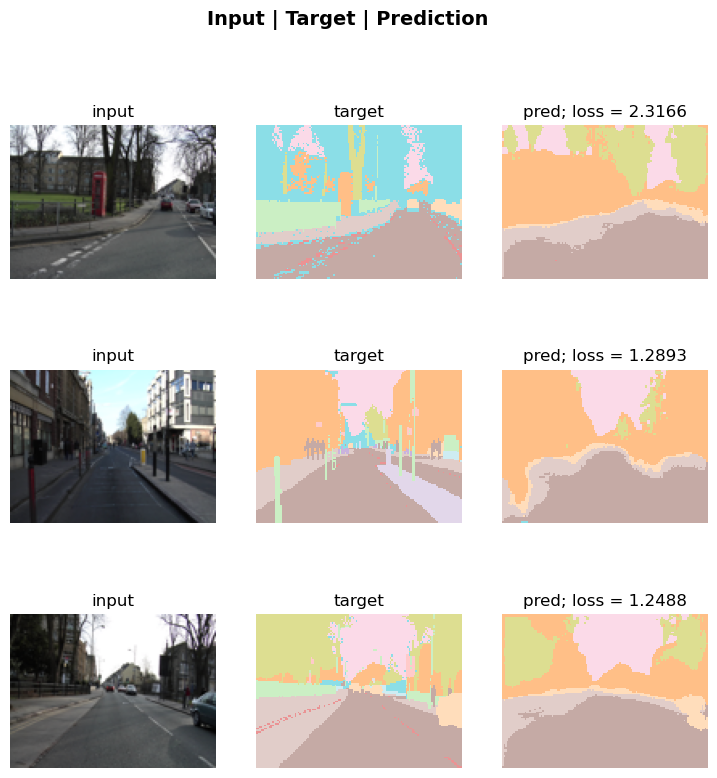

In [12]:
interp = SegmentationInterpretation.from_learner(learn)
interp.plot_top_losses(k=3)